In [1]:
8  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


Bad key "text.kerning_factor" on line 4 in
C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf

Using TensorFlow backend.


In [427]:
a = pd.read_csv("D:Training Data Set.csv")

In [428]:
a.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [429]:
a.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'Price'],
      dtype='object')

In [430]:
a.shape

(53515, 17)

In [431]:
a_maker=pd.get_dummies(a['Maker'])
a_model=pd.get_dummies(a['model'])
a_location=pd.get_dummies(a['Location'])
a_transmission=pd.get_dummies(a['transmission'])
a_fueltype=pd.get_dummies(a['fuel_type'])

au=pd.concat([a,a_maker,a_model,a_location,a_transmission,a_fueltype],axis=1)
au.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,...,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,auto,man,diesel,petrol
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,...,0,0,0,0,0,0,0,1,0,1
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,...,0,0,0,0,0,0,0,1,0,1
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,...,1,0,0,0,0,0,1,0,1,0
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,...,0,0,0,0,1,0,0,1,0,1
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,...,0,1,0,0,0,0,1,0,1,0


In [432]:
a=au.drop(['Maker', 'model', 'Location', 'transmission', 'fuel_type'],axis=1)
a.head()

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,door_count,...,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,auto,man,diesel,petrol
0,25001,NaN,Second,1964,55,1964,147.0,compact,8,None,...,0,0,0,0,0,0,0,1,0,1
1,25002,27750.0,Third,2012,7,1242,51.0,NaN,6,4,...,0,0,0,0,0,0,0,1,0,1
2,25003,46000.0,Third,2014,5,1995,105.0,NaN,7,4,...,1,0,0,0,0,0,1,0,1,0
3,25004,43949.0,Third,2011,8,1618,140.0,NaN,7,4,...,0,0,0,0,1,0,0,1,0,1
4,25005,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,4,...,0,1,0,0,0,0,1,0,1,0


In [433]:
cat_col = a.select_dtypes(['object']).columns
cat_col # no cat columns

Index(['Owner Type', 'body_type', 'door_count', 'seat_count'], dtype='object')

In [444]:
a['Owner Type'].replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace=True)

In [435]:
a['door_count'].value_counts()

4       33808
5        7630
None     7534
2        4348
3         185
6           8
1           2
Name: door_count, dtype: int64

In [436]:
a['door_count'].replace({'None':np.nan},inplace=True)

In [437]:
a['door_count']=pd.to_numeric(a['door_count'],errors='coerce')

In [438]:
a['seat_count'].replace({'None':np.nan},inplace=True)

In [439]:
a['seat_count']=pd.to_numeric(a['seat_count'],errors='coerce')

In [440]:
a.drop('Id',axis = 1,inplace = True)

In [441]:
a.shape

(53515, 57)

In [442]:
a.describe()

,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Price,audi,...,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,auto,man,diesel,petrol
count,5.230400e+04,53515.000000,53515.000000,53515.000000,52076.000000,53515.000000,45981.000000,45004.000000,5.351500e+04,53515.000000,...,53515.000000,53515.000000,53515.000000,53515.000000,53515.000000,53515.000000,53515.000000,53515.000000,53515.000000,53515.000000
mean,9.454626e+04,2010.408110,8.591890,1904.049014,100.448345,5.998374,3.973011,4.886099,1.098084e+06,0.136896,...,0.089769,0.091003,0.092852,0.090965,0.090816,0.090853,0.313576,0.686424,0.514977,0.485023
std,2.755617e+05,4.650322,4.650322,1496.564596,45.330622,1.418336,0.740659,0.564332,8.441565e+05,0.343741,...,0.285854,0.287615,0.290228,0.287562,0.287349,0.287403,0.463950,0.463950,0.499780,0.499780
min,0.000000e+00,1934.000000,3.000000,14.000000,10.000000,4.000000,1.000000,1.000000,3.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.549000e+04,2008.000000,5.000000,1395.000000,73.000000,5.000000,4.000000,5.000000,5.051812e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.552000e+04,2011.000000,8.000000,1896.000000,91.000000,6.000000,4.000000,5.000000,8.854552e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.356410e+05,2014.000000,11.000000,1995.000000,125.000000,7.000000,4.000000,5.000000,1.477829e+06,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,9.899800e+06,2016.000000,85.000000,32000.000000,896.000000,8.000000,6.000000,9.000000,2.212078e+07,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Missing Values

In [443]:
a.isnull().sum()

Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
door_count              7534
seat_count              8511
Price                      0
audi                       0
bmw                        0
fiat                       0
hyundai                    0
maserati                   0
nissan                     0
skoda                      0
toyota                     0
auris                      0
avensis                    0
aygo                       0
citigo                     0
coupe                      0
i30                        0
juke                       0
micra                      0
octavia                    0
panda                      0
q3                         0
q5                         0
q7                         0
qashqai                    0
rapid                      0
roomster      

In [445]:
a['door_count'].value_counts()

4.0    33808
5.0     7630
2.0     4348
3.0      185
6.0        8
1.0        2
Name: door_count, dtype: int64

In [446]:
a['door_count'].fillna(a['door_count'].mode()[0], inplace=True)

In [447]:
a['seat_count'].fillna(a['seat_count'].mode()[0], inplace=True)

In [448]:
a['engine_power'].fillna(a['engine_power'].median(), inplace=True)

In [449]:
a['Distance '].fillna(a['Distance '].median(), inplace=True)
#a.drop('body_type',axis =1, inplace = True)

In [450]:
a.drop('body_type',axis =1, inplace = True)

### EDA

In [451]:
a.corr()

,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Price,...,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,auto,man,diesel,petrol
Distance,1.000000,-0.006665,-0.217804,0.217804,0.091652,0.009684,-0.006235,0.028641,0.025642,-0.155366,...,0.001619,-0.001013,0.002282,0.007935,0.005264,-0.004956,-0.017691,0.017691,0.015671,-0.015671
Owner Type,-0.006665,1.000000,0.005409,-0.005409,-0.004116,-0.001871,-0.003931,0.001360,0.003678,-0.003600,...,0.000838,0.001535,-0.004432,-0.001952,0.002350,0.002175,-0.002788,0.002788,0.000428,-0.000428
manufacture_year,-0.217804,0.005409,1.000000,-1.000000,-0.090401,0.048981,0.003985,0.118545,0.042940,0.506707,...,-0.003705,-0.000356,-0.011421,0.005007,-0.001180,-0.003261,0.127930,-0.127930,0.112386,-0.112386
Age of car,0.217804,-0.005409,-1.000000,1.000000,0.090401,-0.048981,-0.003985,-0.118545,-0.042940,-0.506707,...,0.003705,0.000356,0.011421,-0.005007,0.001180,0.003261,-0.127930,0.127930,-0.112386,0.112386
engine_displacement,0.091652,-0.004116,-0.090401,0.090401,1.000000,0.312616,-0.005828,0.018502,0.077659,0.162072,...,-0.002779,0.000361,0.002412,-0.003518,0.012895,-0.000588,0.207715,-0.207715,0.125746,-0.125746
engine_power,0.009684,-0.001871,0.048981,-0.048981,0.312616,1.000000,-0.001641,-0.079306,0.054785,0.620668,...,0.004292,-0.000639,-0.002031,0.002861,-0.004176,-0.001152,0.505516,-0.505516,0.289365,-0.289365
Vroom Audit Rating,-0.006235,-0.003931,0.003985,-0.003985,-0.005828,-0.001641,1.000000,-0.005009,-0.002876,0.005109,...,-0.001484,0.001279,-0.005671,-0.006785,0.000271,0.005038,-0.002945,0.002945,0.002789,-0.002789
door_count,0.028641,0.001360,0.118545,-0.118545,0.018502,-0.079306,-0.005009,1.000000,0.425344,-0.050817,...,-0.009673,0.002549,-0.001573,0.000368,-0.004859,-0.000497,-0.021168,0.021168,0.245546,-0.245546
seat_count,0.025642,0.003678,0.042940,-0.042940,0.077659,0.054785,-0.002876,0.425344,1.000000,0.081610,...,-0.008164,0.001436,-0.006205,-0.002217,-0.001563,0.013990,0.104295,-0.104295,0.234468,-0.234468
Price,-0.155366,-0.003600,0.506707,-0.506707,0.162072,0.620668,0.005109,-0.050817,0.081610,1.000000,...,-0.000069,-0.000279,-0.006627,0.005209,-0.005006,-0.003266,0.499240,-0.499240,0.316354,-0.316354


In [234]:
a.columns

Index(['Distance ', 'Owner Type', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'door_count', 'seat_count', 'Price', 'audi', 'bmw', 'fiat', 'hyundai',
       'maserati', 'nissan', 'skoda', 'toyota', 'auris', 'avensis', 'aygo',
       'citigo', 'coupe', 'i30', 'juke', 'micra', 'octavia', 'panda', 'q3',
       'q5', 'q7', 'qashqai', 'rapid', 'roomster', 'superb', 'tt', 'x1', 'x3',
       'x5', 'yaris', 'yeti', 'Ahmedabad', 'Bangalore', 'Chennai',
       'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata',
       'Mumbai', 'Pune', 'auto', 'man', 'diesel', 'petrol'],
      dtype='object')

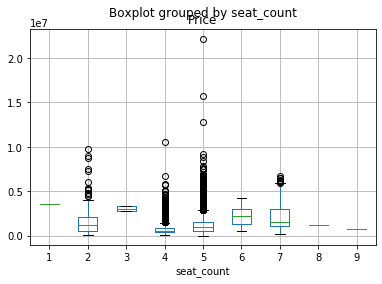

In [63]:
a.boxplot(column='Price',by='seat_count')

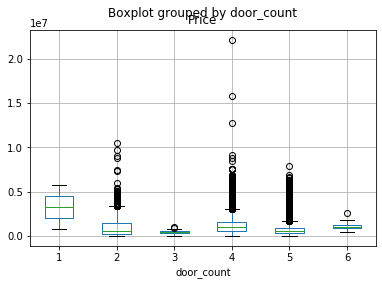

In [64]:
a.boxplot(column='Price',by='door_count')

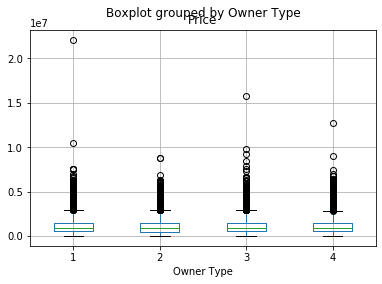

In [65]:
a.boxplot(column='Price',by='Owner Type')

In [452]:
X=a.drop('Price',axis=1)
y=a['Price']

In [453]:
Xc=sm.add_constant(X)

In [454]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [455]:
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     3178.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:02:35   Log-Likelihood:            -7.7138e+05
No. Observations:               53515   AIC:                         1.543e+06
Df Residuals:                   53469   BIC:                         1.543e+06
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -41.4070      0.240   -172.480      0.000     -41.878     -40.937
Distance               -0.1715      0.007    -23.708      0.000      -0.186      -0.157
Owner Type          -3996.4669   1704.220     -2.345      0.019   -7336.752    -656.182
manufacture_year      833.3874     16.120     51.700      0.000     801.792     864.982
Age of car          -8.443e+04    487.176   -173.314      0.000   -8.54e+04   -8.35e+04
engine_displacement    -4.0206      1.373     -2.929      0.003      -6.711      -1.330
engine_power         4174.4463     76.794     54.359      0.000    4023.930    4324.962
Vroom Audit Rating   1185.1517   1343.399      0.882      0.378   -1447.922    3818.226
door_count           -6.98e+04   3937.956    -17.725      0.000   -7.75e+04   -6.21e+04
seat_count           3.712e+04   5272.490      7.040      0.000    2.68e+04    4.75e+04
audi                 2.205e+05   1.91e+04     11.525      0.000    1.83e+05    2.58e+05
bmw                  2.209e+05   7945.209     27.802      0.000    2.05e+05    2.36e+05
fiat                 5.858e+05   4.26e+04     13.741      0.000    5.02e+05    6.69e+05
hyundai             -5.442e+05   3.02e+04    -18.029      0.000   -6.03e+05   -4.85e+05
maserati             3.502e+05   6.24e+04      5.615      0.000    2.28e+05    4.72e+05
nissan              -2.277e+05   8372.354    -27.198      0.000   -2.44e+05   -2.11e+05
skoda               -3.002e+05   8819.844    -34.035      0.000   -3.17e+05   -2.83e+05
toyota              -3.054e+05   8500.812    -35.925      0.000   -3.22e+05   -2.89e+05
auris               -3.252e+04   9650.504     -3.369      0.001   -5.14e+04   -1.36e+04
avensis              7.432e+04   1.03e+04      7.247      0.000    5.42e+04    9.44e+04
aygo                -2.604e+05   1.08e+04    -24.173      0.000   -2.82e+05   -2.39e+05
citigo              -3.675e+05    1.3e+04    -28.254      0.000   -3.93e+05   -3.42e+05
coupe                1.597e+05   1.43e+04     11.128      0.000    1.32e+05    1.88e+05
i30                  8.437e+04   3.01e+04      2.801      0.005    2.53e+04    1.43e+05
juke                -1.756e+05   1.15e+04    -15.306      0.000   -1.98e+05   -1.53e+05
micra               -1.381e+05      1e+04    -13.755      0.000   -1.58e+05   -1.18e+05
octavia              6.168e+04   5665.122     10.888      0.000    5.06e+04    7.28e+04
panda                -9.79e+05   4.48e+04    -21.853      0.000   -1.07e+06   -8.91e+05
q3                   2.553e+05   1.59e+04     16.078      0.000    2.24e+05    2.86e+05
q5                   3.547e+05   1.56e+04     22.788      0.000    3.24e+05    3.85e+05
q7                    6.56e+05   1.86e+04     35.343      0.000     6.2e+05    6.92e+05
qashqai              8.606e+04   8219.709     10.470      0.000    6.99e+04    1.02e+05
rap

In [456]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(y,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['Distance ', 'Owner Type', 'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power', 'door_count', 'seat_count', 'audi', 'bmw', 'fiat', 'hyundai', 'maserati', 'nissan', 'skoda', 'toyota', 'auris', 'avensis', 'aygo', 'citigo', 'coupe', 'i30', 'juke', 'micra', 'octavia', 'panda', 'q3', 'q5', 'q7', 'qashqai', 'rapid', 'roomster', 'superb', 'tt', 'x1', 'x3', 'x5', 'yaris', 'yeti', 'Ahmedabad', 'auto', 'man', 'diesel', 'petrol']


In [ ]:
['Distance ', 'Owner Type', 'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power', 'door_count', 'seat_count', 'audi', 'bmw', 'fiat', 'hyundai', 'maserati', 'nissan', 'skoda', 'toyota', 'auris', 'avensis', 'aygo', 'citigo', 'coupe', 'i30', 'juke', 'micra', 'octavia', 'panda', 'q3', 'q5', 'q7', 'qashqai', 'rapid', 'roomster', 
 'superb', 'tt', 'x1', 'x3', 'x5', 'yaris', 'yeti', 'Ahmedabad', 'auto', 'man', 'diesel', 'petrol']

In [457]:
X.shape

(53515, 44)

In [458]:
X_new=X[selected_features]
X_new.head()

,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,door_count,seat_count,audi,bmw,...,x1,x3,x5,yaris,yeti,Ahmedabad,auto,man,diesel,petrol
0,65520.0,2,1964,55,1964,147.0,4.0,5.0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,27750.0,3,2012,7,1242,51.0,4.0,4.0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,46000.0,3,2014,5,1995,105.0,4.0,5.0,0,1,...,1,0,0,0,0,0,1,0,1,0
3,43949.0,3,2011,8,1618,140.0,4.0,5.0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,59524.0,4,2012,7,2993,180.0,4.0,5.0,0,1,...,0,0,1,0,0,0,1,0,1,0


In [459]:
X_new.drop('Ahmedabad',axis = 1, inplace = True)

In [460]:
X_new.shape

(53515, 43)

In [461]:
X.shape

(53515, 44)

In [462]:
X = X_new

In [463]:
X.skew()

Distance               23.602915
Owner Type              0.001013
manufacture_year       -1.912556
Age of car              1.912556
engine_displacement    12.730460
engine_power            1.791230
door_count             -1.476405
seat_count             -1.841611
audi                    2.112739
bmw                     2.147228
fiat                    5.103194
hyundai                 4.575531
maserati               37.488251
nissan                  2.621296
skoda                   0.395806
toyota                  1.999441
auris                   5.399594
avensis                 5.694244
aygo                    5.748321
citigo                  6.693664
coupe                   5.322586
i30                     4.814998
juke                    7.284078
micra                   5.381835
octavia                 1.244780
panda                   5.223722
q3                      5.278419
q5                      4.825622
q7                      6.325346
qashqai                 3.975940
rapid     

In [258]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold
import xgboost as xgb
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor

In [464]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,RobustScaler

In [465]:
sc=StandardScaler()
Xs = sc.fit_transform(X)

In [480]:
#LR=LinearRegression()
#RF1=RandomForestRegressor(criterion='mse',n_estimators=79,random_state=0,min_samples_split=7,min_samples_leaf=2,max_features='sqrt',max_depth=83,bootstrap= False)
#RF1=RandomForestRegressor(criterion='mse',n_estimators=47,random_state=0,min_samples_split=4,min_samples_leaf=2,max_features='sqrt',max_depth=45,bootstrap= False)

#Rf_boost=AdaBoostRegressor(base_estimator=RF1,random_state = 0,n_estimators = 9)
#dt_bag=BaggingRegressor(n_estimators=98,random_state=0)
#KNN=KNeighborsRegressor(n_neighbors=12,metric='manhattan',weights='distance')
#knn_bag=BaggingRegressor(base_estimator=KNN,n_estimators=93,random_state=0)
#xgboost = xgb.XGBRegressor(colsample_bytree=0.9285209731999253,gamma=3.817544424320814, max_depth=10, min_child_weight=8,n_estimators=804, reg_alpha=40, reg_lambda=0.2940812748512633)
#cb = CatBoostRegressor(n_estimators = 1000,random_state = 0)
#lgbm = LGBMRegressor(n_estimators = 1000,random_state = 0)
#ext = ExtraTreesRegressor(n_estimators=1000,random_state=0)
stacked = VotingRegressor(estimators = [('lgbm',lgbm),('GB',GB),('cb',cb),('RF1',RF1)])
#GB=GradientBoostingRegressor(n_estimators=1000,random_state=0)


In [481]:
models = []
#models.append(('LinearRegression', LR))
#models.append(('RF_with_best_VE',RF1))
#models.append(('BoostedRF',Rf_boost))
#models.append(('BaggedDT',dt_bag))
#models.append(('KNN',KNN))
#models.append(('BaggedKNN',knn_bag))
#models.append(('XGB',xgboost))
#models.append(('cb',cb))
#models.append(('lgbm',lgbm))
models.append(('stacked',stacked))
#models.append(('Ext',ext))
#models.append(('svr',svr))
#models.append(('GB',GB))


0:	learn: 828354.9175933	total: 95.5ms	remaining: 1m 35s
1:	learn: 810052.1504018	total: 125ms	remaining: 1m 2s
2:	learn: 792187.6820725	total: 138ms	remaining: 45.9s
3:	learn: 774527.2550456	total: 150ms	remaining: 37.3s
4:	learn: 758008.2687652	total: 161ms	remaining: 32.1s
5:	learn: 741944.6379906	total: 173ms	remaining: 28.7s
6:	learn: 726330.7604228	total: 185ms	remaining: 26.3s
7:	learn: 710608.9130357	total: 197ms	remaining: 24.4s
8:	learn: 695594.4137542	total: 208ms	remaining: 22.9s
9:	learn: 681456.0966573	total: 220ms	remaining: 21.7s
10:	learn: 667755.2109197	total: 250ms	remaining: 22.5s
11:	learn: 654218.8690566	total: 261ms	remaining: 21.5s
12:	learn: 641260.0165360	total: 277ms	remaining: 21s
13:	learn: 628492.3631241	total: 296ms	remaining: 20.9s
14:	learn: 616460.0990846	total: 319ms	remaining: 21s
15:	learn: 604718.7281332	total: 336ms	remaining: 20.7s
16:	learn: 593567.8474042	total: 352ms	remaining: 20.4s
17:	learn: 582773.6827267	total: 369ms	remaining: 20.1s
18:	

156:	learn: 256668.3291944	total: 2.3s	remaining: 12.4s
157:	learn: 256391.3329592	total: 2.31s	remaining: 12.3s
158:	learn: 256211.2329626	total: 2.33s	remaining: 12.3s
159:	learn: 255905.8340715	total: 2.34s	remaining: 12.3s
160:	learn: 255729.2082820	total: 2.36s	remaining: 12.3s
161:	learn: 255463.7592239	total: 2.37s	remaining: 12.3s
162:	learn: 255186.7702934	total: 2.38s	remaining: 12.2s
163:	learn: 255009.3504663	total: 2.39s	remaining: 12.2s
164:	learn: 254772.1934807	total: 2.4s	remaining: 12.2s
165:	learn: 254600.7297967	total: 2.42s	remaining: 12.1s
166:	learn: 254436.4016628	total: 2.43s	remaining: 12.1s
167:	learn: 254275.2797642	total: 2.44s	remaining: 12.1s
168:	learn: 254093.4257373	total: 2.45s	remaining: 12s
169:	learn: 253849.8830786	total: 2.46s	remaining: 12s
170:	learn: 253710.3054866	total: 2.47s	remaining: 12s
171:	learn: 253585.4929043	total: 2.49s	remaining: 12s
172:	learn: 253401.3670562	total: 2.51s	remaining: 12s
173:	learn: 253242.0461234	total: 2.52s	rem

305:	learn: 238571.2507275	total: 4.49s	remaining: 10.2s
306:	learn: 238505.9129735	total: 4.5s	remaining: 10.2s
307:	learn: 238439.0234910	total: 4.51s	remaining: 10.1s
308:	learn: 238373.8370630	total: 4.53s	remaining: 10.1s
309:	learn: 238304.9040099	total: 4.54s	remaining: 10.1s
310:	learn: 238203.6001414	total: 4.55s	remaining: 10.1s
311:	learn: 238146.4611080	total: 4.56s	remaining: 10.1s
312:	learn: 238059.9823382	total: 4.57s	remaining: 10s
313:	learn: 237980.5818375	total: 4.58s	remaining: 10s
314:	learn: 237927.6639771	total: 4.59s	remaining: 9.99s
315:	learn: 237876.7856613	total: 4.6s	remaining: 9.97s
316:	learn: 237755.9770684	total: 4.62s	remaining: 9.95s
317:	learn: 237692.8271175	total: 4.63s	remaining: 9.92s
318:	learn: 237610.5348982	total: 4.64s	remaining: 9.9s
319:	learn: 237561.8229286	total: 4.65s	remaining: 9.88s
320:	learn: 237516.1350774	total: 4.66s	remaining: 9.87s
321:	learn: 237444.1630840	total: 4.68s	remaining: 9.85s
322:	learn: 237393.5775787	total: 4.69

457:	learn: 229679.9798723	total: 6.28s	remaining: 7.43s
458:	learn: 229649.1197050	total: 6.29s	remaining: 7.41s
459:	learn: 229598.8639075	total: 6.3s	remaining: 7.4s
460:	learn: 229547.5294082	total: 6.32s	remaining: 7.39s
461:	learn: 229495.0043807	total: 6.33s	remaining: 7.37s
462:	learn: 229448.9715280	total: 6.34s	remaining: 7.35s
463:	learn: 229400.2540829	total: 6.35s	remaining: 7.34s
464:	learn: 229361.5358810	total: 6.36s	remaining: 7.32s
465:	learn: 229331.2070894	total: 6.37s	remaining: 7.3s
466:	learn: 229279.6407726	total: 6.38s	remaining: 7.29s
467:	learn: 229241.2195477	total: 6.39s	remaining: 7.27s
468:	learn: 229183.0122279	total: 6.41s	remaining: 7.25s
469:	learn: 229125.9395397	total: 6.42s	remaining: 7.24s
470:	learn: 229085.6385371	total: 6.43s	remaining: 7.22s
471:	learn: 229058.2290455	total: 6.44s	remaining: 7.2s
472:	learn: 229016.6549659	total: 6.45s	remaining: 7.19s
473:	learn: 228966.5080722	total: 6.47s	remaining: 7.18s
474:	learn: 228932.3846722	total: 6

610:	learn: 223567.0005493	total: 8.06s	remaining: 5.13s
611:	learn: 223540.8382104	total: 8.08s	remaining: 5.12s
612:	learn: 223537.6721967	total: 8.09s	remaining: 5.11s
613:	learn: 223521.0870180	total: 8.1s	remaining: 5.09s
614:	learn: 223517.2007354	total: 8.11s	remaining: 5.08s
615:	learn: 223484.9267208	total: 8.12s	remaining: 5.06s
616:	learn: 223455.2096987	total: 8.13s	remaining: 5.05s
617:	learn: 223434.0203951	total: 8.14s	remaining: 5.03s
618:	learn: 223410.5925177	total: 8.15s	remaining: 5.02s
619:	learn: 223396.5726669	total: 8.16s	remaining: 5s
620:	learn: 223375.8352028	total: 8.18s	remaining: 4.99s
621:	learn: 223354.6700726	total: 8.19s	remaining: 4.97s
622:	learn: 223350.8820094	total: 8.2s	remaining: 4.96s
623:	learn: 223318.4493948	total: 8.21s	remaining: 4.95s
624:	learn: 223314.6349440	total: 8.22s	remaining: 4.93s
625:	learn: 223285.1677638	total: 8.23s	remaining: 4.92s
626:	learn: 223281.4977921	total: 8.25s	remaining: 4.91s
627:	learn: 223250.9565743	total: 8.

760:	learn: 220103.6545311	total: 10.2s	remaining: 3.21s
761:	learn: 220080.6772859	total: 10.2s	remaining: 3.19s
762:	learn: 220076.6082721	total: 10.2s	remaining: 3.18s
763:	learn: 220055.3467275	total: 10.2s	remaining: 3.16s
764:	learn: 220051.3598956	total: 10.3s	remaining: 3.15s
765:	learn: 220018.5951927	total: 10.3s	remaining: 3.14s
766:	learn: 220000.7153386	total: 10.3s	remaining: 3.12s
767:	learn: 219984.0036713	total: 10.3s	remaining: 3.11s
768:	learn: 219968.3320595	total: 10.3s	remaining: 3.09s
769:	learn: 219948.8163081	total: 10.3s	remaining: 3.08s
770:	learn: 219944.9118086	total: 10.3s	remaining: 3.06s
771:	learn: 219929.4459883	total: 10.3s	remaining: 3.05s
772:	learn: 219913.8593827	total: 10.3s	remaining: 3.04s
773:	learn: 219910.0164568	total: 10.4s	remaining: 3.02s
774:	learn: 219907.5520724	total: 10.4s	remaining: 3.01s
775:	learn: 219898.1099649	total: 10.4s	remaining: 3s
776:	learn: 219878.9017959	total: 10.4s	remaining: 2.98s
777:	learn: 219862.2626634	total: 

905:	learn: 216795.5593987	total: 11.9s	remaining: 1.23s
906:	learn: 216789.0108476	total: 11.9s	remaining: 1.22s
907:	learn: 216783.4022978	total: 11.9s	remaining: 1.21s
908:	learn: 216763.0378501	total: 11.9s	remaining: 1.19s
909:	learn: 216756.1296079	total: 11.9s	remaining: 1.18s
910:	learn: 216754.6705433	total: 11.9s	remaining: 1.17s
911:	learn: 216742.8628208	total: 12s	remaining: 1.15s
912:	learn: 216730.7942681	total: 12s	remaining: 1.14s
913:	learn: 216718.8590217	total: 12s	remaining: 1.13s
914:	learn: 216704.6598815	total: 12s	remaining: 1.11s
915:	learn: 216685.0730246	total: 12s	remaining: 1.1s
916:	learn: 216671.7456986	total: 12s	remaining: 1.09s
917:	learn: 216653.9782779	total: 12s	remaining: 1.07s
918:	learn: 216634.5095354	total: 12s	remaining: 1.06s
919:	learn: 216633.0695964	total: 12s	remaining: 1.05s
920:	learn: 216622.9240263	total: 12.1s	remaining: 1.03s
921:	learn: 216608.8861130	total: 12.1s	remaining: 1.02s
922:	learn: 216597.5922265	total: 12.1s	remaining:

56:	learn: 345967.3293172	total: 1.24s	remaining: 20.5s
57:	learn: 343286.1873326	total: 1.27s	remaining: 20.7s
58:	learn: 340543.7102792	total: 1.29s	remaining: 20.5s
59:	learn: 338160.7559046	total: 1.3s	remaining: 20.4s
60:	learn: 335721.3092461	total: 1.31s	remaining: 20.2s
61:	learn: 333247.3601615	total: 1.33s	remaining: 20.1s
62:	learn: 330852.6264418	total: 1.35s	remaining: 20.1s
63:	learn: 328583.1879803	total: 1.38s	remaining: 20.2s
64:	learn: 326361.9709266	total: 1.39s	remaining: 20.1s
65:	learn: 324379.1552311	total: 1.41s	remaining: 20s
66:	learn: 322219.1981579	total: 1.45s	remaining: 20.2s
67:	learn: 320341.9554302	total: 1.47s	remaining: 20.1s
68:	learn: 318369.2837406	total: 1.49s	remaining: 20.1s
69:	learn: 316509.9896857	total: 1.5s	remaining: 19.9s
70:	learn: 314584.2639301	total: 1.51s	remaining: 19.8s
71:	learn: 312952.0664565	total: 1.53s	remaining: 19.7s
72:	learn: 311172.0746469	total: 1.54s	remaining: 19.6s
73:	learn: 309440.2864685	total: 1.55s	remaining: 19

206:	learn: 251009.6510005	total: 3.26s	remaining: 12.5s
207:	learn: 250924.5203520	total: 3.28s	remaining: 12.5s
208:	learn: 250770.2692895	total: 3.29s	remaining: 12.4s
209:	learn: 250645.5716573	total: 3.3s	remaining: 12.4s
210:	learn: 250488.2094959	total: 3.32s	remaining: 12.4s
211:	learn: 250348.5603984	total: 3.34s	remaining: 12.4s
212:	learn: 250246.5763481	total: 3.35s	remaining: 12.4s
213:	learn: 250110.2737579	total: 3.36s	remaining: 12.3s
214:	learn: 249999.3508898	total: 3.37s	remaining: 12.3s
215:	learn: 249916.5457697	total: 3.38s	remaining: 12.3s
216:	learn: 249802.5439399	total: 3.4s	remaining: 12.3s
217:	learn: 249654.9912804	total: 3.41s	remaining: 12.2s
218:	learn: 249533.5110749	total: 3.42s	remaining: 12.2s
219:	learn: 249421.3209034	total: 3.43s	remaining: 12.2s
220:	learn: 249270.8457416	total: 3.45s	remaining: 12.2s
221:	learn: 249125.1818770	total: 3.46s	remaining: 12.1s
222:	learn: 249044.3158511	total: 3.47s	remaining: 12.1s
223:	learn: 248942.4546310	total:

352:	learn: 239276.6714469	total: 5.44s	remaining: 9.97s
353:	learn: 239240.7965482	total: 5.47s	remaining: 9.97s
354:	learn: 239183.6475243	total: 5.48s	remaining: 9.95s
355:	learn: 239158.1493598	total: 5.49s	remaining: 9.93s
356:	learn: 239134.4179608	total: 5.5s	remaining: 9.91s
357:	learn: 239103.8904093	total: 5.52s	remaining: 9.89s
358:	learn: 239042.1270463	total: 5.54s	remaining: 9.88s
359:	learn: 239001.6903963	total: 5.55s	remaining: 9.87s
360:	learn: 238935.4260781	total: 5.56s	remaining: 9.85s
361:	learn: 238880.3173633	total: 5.58s	remaining: 9.84s
362:	learn: 238796.6111149	total: 5.6s	remaining: 9.82s
363:	learn: 238727.3263678	total: 5.63s	remaining: 9.83s
364:	learn: 238694.7146279	total: 5.64s	remaining: 9.81s
365:	learn: 238683.1185574	total: 5.66s	remaining: 9.8s
366:	learn: 238628.6946177	total: 5.68s	remaining: 9.79s
367:	learn: 238535.9890734	total: 5.7s	remaining: 9.78s
368:	learn: 238496.9172810	total: 5.71s	remaining: 9.77s
369:	learn: 238427.0645473	total: 5

501:	learn: 232157.4258364	total: 7.98s	remaining: 7.92s
502:	learn: 232118.2689581	total: 8s	remaining: 7.9s
503:	learn: 232106.7013355	total: 8.01s	remaining: 7.89s
504:	learn: 232067.8375968	total: 8.03s	remaining: 7.87s
505:	learn: 232039.5098737	total: 8.05s	remaining: 7.86s
506:	learn: 232013.4204323	total: 8.06s	remaining: 7.84s
507:	learn: 231987.6291069	total: 8.07s	remaining: 7.82s
508:	learn: 231937.8369792	total: 8.09s	remaining: 7.8s
509:	learn: 231896.6665352	total: 8.1s	remaining: 7.78s
510:	learn: 231859.8291782	total: 8.12s	remaining: 7.77s
511:	learn: 231833.8839558	total: 8.13s	remaining: 7.75s
512:	learn: 231789.5537667	total: 8.15s	remaining: 7.73s
513:	learn: 231756.5166457	total: 8.17s	remaining: 7.72s
514:	learn: 231733.6953309	total: 8.18s	remaining: 7.71s
515:	learn: 231700.5308378	total: 8.2s	remaining: 7.69s
516:	learn: 231689.7384745	total: 8.21s	remaining: 7.67s
517:	learn: 231641.5733605	total: 8.22s	remaining: 7.65s
518:	learn: 231605.5249462	total: 8.24

659:	learn: 227074.6919235	total: 10.1s	remaining: 5.22s
660:	learn: 227060.7757873	total: 10.1s	remaining: 5.21s
661:	learn: 227020.1386074	total: 10.2s	remaining: 5.19s
662:	learn: 227008.0413290	total: 10.2s	remaining: 5.17s
663:	learn: 226991.8684288	total: 10.2s	remaining: 5.15s
664:	learn: 226965.4779395	total: 10.2s	remaining: 5.13s
665:	learn: 226951.8283971	total: 10.2s	remaining: 5.12s
666:	learn: 226931.5612961	total: 10.2s	remaining: 5.1s
667:	learn: 226919.1550014	total: 10.2s	remaining: 5.08s
668:	learn: 226895.4069210	total: 10.2s	remaining: 5.06s
669:	learn: 226870.7331648	total: 10.2s	remaining: 5.04s
670:	learn: 226849.2649751	total: 10.3s	remaining: 5.03s
671:	learn: 226840.5871012	total: 10.3s	remaining: 5.01s
672:	learn: 226813.1764870	total: 10.3s	remaining: 4.99s
673:	learn: 226792.6389303	total: 10.3s	remaining: 4.97s
674:	learn: 226769.3325719	total: 10.3s	remaining: 4.96s
675:	learn: 226749.8313527	total: 10.3s	remaining: 4.94s
676:	learn: 226725.7112754	total

813:	learn: 223855.6716675	total: 12.1s	remaining: 2.77s
814:	learn: 223834.5199515	total: 12.2s	remaining: 2.76s
815:	learn: 223831.1043950	total: 12.2s	remaining: 2.74s
816:	learn: 223822.6202710	total: 12.2s	remaining: 2.73s
817:	learn: 223812.7347095	total: 12.2s	remaining: 2.71s
818:	learn: 223790.1905381	total: 12.2s	remaining: 2.7s
819:	learn: 223777.5082691	total: 12.2s	remaining: 2.68s
820:	learn: 223764.2819037	total: 12.2s	remaining: 2.67s
821:	learn: 223748.4607370	total: 12.3s	remaining: 2.65s
822:	learn: 223729.5199067	total: 12.3s	remaining: 2.64s
823:	learn: 223696.2132267	total: 12.3s	remaining: 2.63s
824:	learn: 223631.3827303	total: 12.3s	remaining: 2.61s
825:	learn: 223615.1396838	total: 12.3s	remaining: 2.6s
826:	learn: 223605.9336650	total: 12.4s	remaining: 2.59s
827:	learn: 223605.1709586	total: 12.4s	remaining: 2.57s
828:	learn: 223568.1198790	total: 12.4s	remaining: 2.56s
829:	learn: 223546.2278766	total: 12.4s	remaining: 2.54s
830:	learn: 223537.8255301	total:

970:	learn: 220993.2176446	total: 14.3s	remaining: 426ms
971:	learn: 220978.8499563	total: 14.3s	remaining: 412ms
972:	learn: 220970.1445872	total: 14.3s	remaining: 397ms
973:	learn: 220952.2034651	total: 14.3s	remaining: 382ms
974:	learn: 220930.2931402	total: 14.3s	remaining: 367ms
975:	learn: 220916.2471570	total: 14.3s	remaining: 353ms
976:	learn: 220906.1713310	total: 14.3s	remaining: 338ms
977:	learn: 220894.1915836	total: 14.4s	remaining: 323ms
978:	learn: 220844.8461072	total: 14.4s	remaining: 308ms
979:	learn: 220835.0857813	total: 14.4s	remaining: 293ms
980:	learn: 220818.6131310	total: 14.4s	remaining: 279ms
981:	learn: 220803.6810468	total: 14.4s	remaining: 264ms
982:	learn: 220769.8446503	total: 14.4s	remaining: 249ms
983:	learn: 220760.2472184	total: 14.4s	remaining: 235ms
984:	learn: 220726.0328404	total: 14.4s	remaining: 220ms
985:	learn: 220710.8041798	total: 14.4s	remaining: 205ms
986:	learn: 220698.2817183	total: 14.5s	remaining: 190ms
987:	learn: 220687.1575171	tota

119:	learn: 268181.5799579	total: 1.65s	remaining: 12.1s
120:	learn: 267777.2705718	total: 1.67s	remaining: 12.1s
121:	learn: 267354.6426246	total: 1.69s	remaining: 12.2s
122:	learn: 267064.0485129	total: 1.7s	remaining: 12.1s
123:	learn: 266754.2576008	total: 1.72s	remaining: 12.1s
124:	learn: 266414.9029835	total: 1.73s	remaining: 12.1s
125:	learn: 266020.0388826	total: 1.74s	remaining: 12.1s
126:	learn: 265671.3083670	total: 1.75s	remaining: 12s
127:	learn: 265253.0725829	total: 1.76s	remaining: 12s
128:	learn: 264896.5145252	total: 1.77s	remaining: 12s
129:	learn: 264518.9313090	total: 1.79s	remaining: 12s
130:	learn: 264175.2873434	total: 1.8s	remaining: 11.9s
131:	learn: 263927.5184079	total: 1.81s	remaining: 11.9s
132:	learn: 263622.1626883	total: 1.82s	remaining: 11.9s
133:	learn: 263334.5213423	total: 1.83s	remaining: 11.9s
134:	learn: 263003.3391537	total: 1.85s	remaining: 11.9s
135:	learn: 262737.8084438	total: 1.86s	remaining: 11.8s
136:	learn: 262410.7706072	total: 1.88s	r

277:	learn: 242652.2972988	total: 3.63s	remaining: 9.44s
278:	learn: 242553.6324953	total: 3.65s	remaining: 9.42s
279:	learn: 242491.6481136	total: 3.66s	remaining: 9.4s
280:	learn: 242409.9254194	total: 3.67s	remaining: 9.39s
281:	learn: 242352.2200772	total: 3.68s	remaining: 9.37s
282:	learn: 242271.0196376	total: 3.69s	remaining: 9.35s
283:	learn: 242221.7166585	total: 3.7s	remaining: 9.34s
284:	learn: 242146.2330206	total: 3.71s	remaining: 9.32s
285:	learn: 242052.6238236	total: 3.73s	remaining: 9.3s
286:	learn: 241985.7603750	total: 3.74s	remaining: 9.29s
287:	learn: 241913.2247711	total: 3.75s	remaining: 9.28s
288:	learn: 241827.5942950	total: 3.77s	remaining: 9.27s
289:	learn: 241760.6259681	total: 3.78s	remaining: 9.26s
290:	learn: 241676.6780598	total: 3.79s	remaining: 9.25s
291:	learn: 241621.7164168	total: 3.81s	remaining: 9.23s
292:	learn: 241587.4665345	total: 3.83s	remaining: 9.23s
293:	learn: 241542.6743512	total: 3.85s	remaining: 9.24s
294:	learn: 241462.5297521	total: 

426:	learn: 234197.2783715	total: 5.87s	remaining: 7.87s
427:	learn: 234129.3106225	total: 5.88s	remaining: 7.86s
428:	learn: 234097.8030639	total: 5.89s	remaining: 7.84s
429:	learn: 234046.0906646	total: 5.91s	remaining: 7.83s
430:	learn: 233992.7433863	total: 5.92s	remaining: 7.82s
431:	learn: 233943.3329729	total: 5.94s	remaining: 7.8s
432:	learn: 233903.4691652	total: 5.95s	remaining: 7.79s
433:	learn: 233857.5211595	total: 5.97s	remaining: 7.78s
434:	learn: 233795.2728505	total: 5.98s	remaining: 7.77s
435:	learn: 233759.6867581	total: 5.99s	remaining: 7.75s
436:	learn: 233718.3642671	total: 6s	remaining: 7.74s
437:	learn: 233688.7490484	total: 6.02s	remaining: 7.72s
438:	learn: 233651.2962733	total: 6.03s	remaining: 7.7s
439:	learn: 233588.8450067	total: 6.05s	remaining: 7.7s
440:	learn: 233537.8231036	total: 6.06s	remaining: 7.69s
441:	learn: 233500.1395633	total: 6.08s	remaining: 7.67s
442:	learn: 233464.2840319	total: 6.09s	remaining: 7.66s
443:	learn: 233391.7670950	total: 6.1

576:	learn: 228372.6378096	total: 8.04s	remaining: 5.89s
577:	learn: 228341.3917679	total: 8.05s	remaining: 5.88s
578:	learn: 228306.9736473	total: 8.07s	remaining: 5.87s
579:	learn: 228254.9977492	total: 8.08s	remaining: 5.85s
580:	learn: 228226.0329815	total: 8.09s	remaining: 5.84s
581:	learn: 228193.8532182	total: 8.11s	remaining: 5.82s
582:	learn: 228168.4204810	total: 8.12s	remaining: 5.81s
583:	learn: 228167.5906050	total: 8.13s	remaining: 5.79s
584:	learn: 228158.8802772	total: 8.15s	remaining: 5.78s
585:	learn: 228118.6836330	total: 8.16s	remaining: 5.77s
586:	learn: 228088.2426257	total: 8.18s	remaining: 5.76s
587:	learn: 228061.0314133	total: 8.19s	remaining: 5.74s
588:	learn: 228039.4637327	total: 8.21s	remaining: 5.73s
589:	learn: 228038.7202186	total: 8.22s	remaining: 5.71s
590:	learn: 227991.3870208	total: 8.23s	remaining: 5.7s
591:	learn: 227965.8043966	total: 8.24s	remaining: 5.68s
592:	learn: 227941.6892276	total: 8.26s	remaining: 5.67s
593:	learn: 227940.8947417	total

729:	learn: 223748.3547585	total: 10.4s	remaining: 3.85s
730:	learn: 223725.9618418	total: 10.4s	remaining: 3.84s
731:	learn: 223707.0179923	total: 10.4s	remaining: 3.82s
732:	learn: 223704.8705910	total: 10.5s	remaining: 3.81s
733:	learn: 223686.5185461	total: 10.5s	remaining: 3.8s
734:	learn: 223681.1597274	total: 10.5s	remaining: 3.78s
735:	learn: 223653.1649033	total: 10.5s	remaining: 3.77s
736:	learn: 223637.7772489	total: 10.5s	remaining: 3.75s
737:	learn: 223618.3255426	total: 10.5s	remaining: 3.74s
738:	learn: 223593.7282172	total: 10.5s	remaining: 3.72s
739:	learn: 223557.5575443	total: 10.5s	remaining: 3.71s
740:	learn: 223343.8863321	total: 10.6s	remaining: 3.69s
741:	learn: 223343.3627975	total: 10.6s	remaining: 3.68s
742:	learn: 223331.8726603	total: 10.6s	remaining: 3.66s
743:	learn: 223313.3145566	total: 10.6s	remaining: 3.65s
744:	learn: 223286.9182566	total: 10.6s	remaining: 3.63s
745:	learn: 223281.7665816	total: 10.6s	remaining: 3.62s
746:	learn: 223267.2406749	total

878:	learn: 220381.8181118	total: 12.4s	remaining: 1.71s
879:	learn: 220362.9215555	total: 12.4s	remaining: 1.7s
880:	learn: 220348.2735487	total: 12.5s	remaining: 1.68s
881:	learn: 220323.5246812	total: 12.5s	remaining: 1.67s
882:	learn: 220305.8570448	total: 12.5s	remaining: 1.66s
883:	learn: 220284.2724766	total: 12.5s	remaining: 1.64s
884:	learn: 220262.1040505	total: 12.5s	remaining: 1.63s
885:	learn: 220248.8781927	total: 12.5s	remaining: 1.61s
886:	learn: 220236.3011383	total: 12.6s	remaining: 1.6s
887:	learn: 220216.8287774	total: 12.6s	remaining: 1.58s
888:	learn: 220200.4808373	total: 12.6s	remaining: 1.57s
889:	learn: 220179.3491409	total: 12.6s	remaining: 1.56s
890:	learn: 220165.5918747	total: 12.6s	remaining: 1.54s
891:	learn: 220146.0032986	total: 12.6s	remaining: 1.53s
892:	learn: 220118.5373085	total: 12.7s	remaining: 1.52s
893:	learn: 220099.9857135	total: 12.7s	remaining: 1.5s
894:	learn: 220081.6602763	total: 12.7s	remaining: 1.49s
895:	learn: 220063.8653335	total: 

31:	learn: 460050.3726890	total: 397ms	remaining: 12s
32:	learn: 453157.7567908	total: 413ms	remaining: 12.1s
33:	learn: 446604.1870006	total: 426ms	remaining: 12.1s
34:	learn: 440233.9902137	total: 439ms	remaining: 12.1s
35:	learn: 434263.5972965	total: 452ms	remaining: 12.1s
36:	learn: 428474.8733601	total: 466ms	remaining: 12.1s
37:	learn: 422926.3514527	total: 479ms	remaining: 12.1s
38:	learn: 417353.1523143	total: 495ms	remaining: 12.2s
39:	learn: 412135.0977884	total: 509ms	remaining: 12.2s
40:	learn: 407118.6499121	total: 521ms	remaining: 12.2s
41:	learn: 402188.9736214	total: 534ms	remaining: 12.2s
42:	learn: 397430.6511778	total: 545ms	remaining: 12.1s
43:	learn: 392832.2113045	total: 562ms	remaining: 12.2s
44:	learn: 388402.3233147	total: 576ms	remaining: 12.2s
45:	learn: 384301.8931458	total: 587ms	remaining: 12.2s
46:	learn: 380570.2524901	total: 598ms	remaining: 12.1s
47:	learn: 376510.1899944	total: 609ms	remaining: 12.1s
48:	learn: 372731.0013525	total: 620ms	remaining: 

188:	learn: 251543.3699707	total: 2.74s	remaining: 11.7s
189:	learn: 251413.0636908	total: 2.75s	remaining: 11.7s
190:	learn: 251278.1291578	total: 2.76s	remaining: 11.7s
191:	learn: 251183.8119818	total: 2.77s	remaining: 11.7s
192:	learn: 251077.7021881	total: 2.79s	remaining: 11.6s
193:	learn: 250941.9187717	total: 2.8s	remaining: 11.6s
194:	learn: 250777.0329143	total: 2.81s	remaining: 11.6s
195:	learn: 250588.3177566	total: 2.82s	remaining: 11.6s
196:	learn: 250430.7251289	total: 2.83s	remaining: 11.5s
197:	learn: 250314.1788652	total: 2.84s	remaining: 11.5s
198:	learn: 250209.1163684	total: 2.85s	remaining: 11.5s
199:	learn: 250067.3384677	total: 2.86s	remaining: 11.5s
200:	learn: 249944.0242927	total: 2.88s	remaining: 11.4s
201:	learn: 249833.6083226	total: 2.89s	remaining: 11.4s
202:	learn: 249650.4366505	total: 2.9s	remaining: 11.4s
203:	learn: 249562.1463295	total: 2.92s	remaining: 11.4s
204:	learn: 249488.1312751	total: 2.93s	remaining: 11.4s
205:	learn: 249368.6003313	total:

335:	learn: 237898.3452987	total: 4.69s	remaining: 9.26s
336:	learn: 237864.7061414	total: 4.71s	remaining: 9.26s
337:	learn: 237834.8642912	total: 4.72s	remaining: 9.24s
338:	learn: 237781.6965012	total: 4.73s	remaining: 9.22s
339:	learn: 237714.2816092	total: 4.74s	remaining: 9.2s
340:	learn: 237637.8754065	total: 4.75s	remaining: 9.19s
341:	learn: 237608.1222987	total: 4.76s	remaining: 9.16s
342:	learn: 237520.9395149	total: 4.78s	remaining: 9.15s
343:	learn: 237460.4588333	total: 4.79s	remaining: 9.13s
344:	learn: 237410.1498353	total: 4.8s	remaining: 9.11s
345:	learn: 237388.4889310	total: 4.81s	remaining: 9.09s
346:	learn: 237340.3407255	total: 4.82s	remaining: 9.06s
347:	learn: 237282.6669663	total: 4.83s	remaining: 9.04s
348:	learn: 237232.1149846	total: 4.84s	remaining: 9.03s
349:	learn: 237166.9429901	total: 4.85s	remaining: 9.01s
350:	learn: 237119.9280434	total: 4.87s	remaining: 9s
351:	learn: 237093.4198564	total: 4.88s	remaining: 8.98s
352:	learn: 237013.0982437	total: 4.

488:	learn: 230780.2402264	total: 6.47s	remaining: 6.76s
489:	learn: 230778.3615281	total: 6.48s	remaining: 6.75s
490:	learn: 230709.8049850	total: 6.5s	remaining: 6.73s
491:	learn: 230707.9522464	total: 6.5s	remaining: 6.72s
492:	learn: 230664.4216386	total: 6.52s	remaining: 6.7s
493:	learn: 230643.7807868	total: 6.53s	remaining: 6.69s
494:	learn: 230621.5657899	total: 6.54s	remaining: 6.67s
495:	learn: 230575.0881440	total: 6.56s	remaining: 6.66s
496:	learn: 230526.3302367	total: 6.59s	remaining: 6.67s
497:	learn: 230474.4164978	total: 6.6s	remaining: 6.65s
498:	learn: 230472.6031859	total: 6.61s	remaining: 6.64s
499:	learn: 230420.6263771	total: 6.63s	remaining: 6.63s
500:	learn: 230402.9612317	total: 6.64s	remaining: 6.62s
501:	learn: 230338.4649095	total: 6.66s	remaining: 6.61s
502:	learn: 230306.9521836	total: 6.67s	remaining: 6.59s
503:	learn: 230276.3932824	total: 6.69s	remaining: 6.58s
504:	learn: 230274.6232500	total: 6.7s	remaining: 6.57s
505:	learn: 230231.2152932	total: 6.

636:	learn: 225862.7445469	total: 8.43s	remaining: 4.8s
637:	learn: 225818.6544767	total: 8.45s	remaining: 4.79s
638:	learn: 225778.4741648	total: 8.46s	remaining: 4.78s
639:	learn: 225748.9162933	total: 8.47s	remaining: 4.76s
640:	learn: 225699.5812665	total: 8.48s	remaining: 4.75s
641:	learn: 225690.0310769	total: 8.49s	remaining: 4.74s
642:	learn: 225663.1377498	total: 8.5s	remaining: 4.72s
643:	learn: 225661.0676473	total: 8.51s	remaining: 4.71s
644:	learn: 225638.2866021	total: 8.52s	remaining: 4.69s
645:	learn: 225619.1421690	total: 8.54s	remaining: 4.68s
646:	learn: 225589.7732213	total: 8.54s	remaining: 4.66s
647:	learn: 225549.2098759	total: 8.56s	remaining: 4.65s
648:	learn: 225522.3455280	total: 8.57s	remaining: 4.63s
649:	learn: 225506.1105913	total: 8.58s	remaining: 4.62s
650:	learn: 225497.2440895	total: 8.59s	remaining: 4.6s
651:	learn: 225472.0712520	total: 8.6s	remaining: 4.59s
652:	learn: 225445.9754148	total: 8.61s	remaining: 4.58s
653:	learn: 225444.8522392	total: 8

793:	learn: 221820.1540050	total: 10.4s	remaining: 2.7s
794:	learn: 221800.1679884	total: 10.4s	remaining: 2.69s
795:	learn: 221799.4902784	total: 10.4s	remaining: 2.67s
796:	learn: 221780.6254536	total: 10.4s	remaining: 2.66s
797:	learn: 221763.3059467	total: 10.5s	remaining: 2.65s
798:	learn: 221734.6152983	total: 10.5s	remaining: 2.63s
799:	learn: 221711.2285207	total: 10.5s	remaining: 2.62s
800:	learn: 221683.8715771	total: 10.5s	remaining: 2.61s
801:	learn: 221659.2945260	total: 10.5s	remaining: 2.59s
802:	learn: 221633.4980646	total: 10.5s	remaining: 2.58s
803:	learn: 221613.4929326	total: 10.5s	remaining: 2.57s
804:	learn: 221590.9730844	total: 10.5s	remaining: 2.55s
805:	learn: 221574.8401980	total: 10.6s	remaining: 2.54s
806:	learn: 221574.1696848	total: 10.6s	remaining: 2.52s
807:	learn: 221565.3042377	total: 10.6s	remaining: 2.51s
808:	learn: 221547.8242114	total: 10.6s	remaining: 2.5s
809:	learn: 221535.8771537	total: 10.6s	remaining: 2.49s
810:	learn: 221513.2327399	total:

942:	learn: 218138.5710755	total: 12.4s	remaining: 753ms
943:	learn: 218124.6375870	total: 12.5s	remaining: 740ms
944:	learn: 218102.3659761	total: 12.5s	remaining: 728ms
945:	learn: 218102.0731903	total: 12.5s	remaining: 715ms
946:	learn: 218080.8946918	total: 12.5s	remaining: 702ms
947:	learn: 218062.7327536	total: 12.5s	remaining: 688ms
948:	learn: 218047.4477847	total: 12.6s	remaining: 675ms
949:	learn: 217934.1883753	total: 12.6s	remaining: 662ms
950:	learn: 217916.8596231	total: 12.6s	remaining: 649ms
951:	learn: 217875.7895135	total: 12.6s	remaining: 636ms
952:	learn: 217842.4592832	total: 12.6s	remaining: 623ms
953:	learn: 217829.6746460	total: 12.6s	remaining: 610ms
954:	learn: 217814.4556266	total: 12.7s	remaining: 597ms
955:	learn: 217813.9890973	total: 12.7s	remaining: 584ms
956:	learn: 217791.4089124	total: 12.7s	remaining: 571ms
957:	learn: 217775.2151298	total: 12.7s	remaining: 558ms
958:	learn: 217767.3228392	total: 12.7s	remaining: 545ms
959:	learn: 217749.1216167	tota

93:	learn: 258863.7649022	total: 1.46s	remaining: 14.1s
94:	learn: 257995.3075630	total: 1.48s	remaining: 14.1s
95:	learn: 257121.8675721	total: 1.49s	remaining: 14.1s
96:	learn: 256174.2442073	total: 1.51s	remaining: 14.1s
97:	learn: 255329.4907134	total: 1.53s	remaining: 14s
98:	learn: 254435.2673158	total: 1.54s	remaining: 14s
99:	learn: 253720.3277564	total: 1.57s	remaining: 14.1s
100:	learn: 252908.3714643	total: 1.59s	remaining: 14.1s
101:	learn: 252078.8043480	total: 1.6s	remaining: 14.1s
102:	learn: 251412.0829005	total: 1.64s	remaining: 14.2s
103:	learn: 250757.8527220	total: 1.66s	remaining: 14.3s
104:	learn: 250037.2649264	total: 1.69s	remaining: 14.4s
105:	learn: 249360.2992469	total: 1.72s	remaining: 14.5s
106:	learn: 248650.6325560	total: 1.74s	remaining: 14.5s
107:	learn: 248073.2299682	total: 1.76s	remaining: 14.6s
108:	learn: 247421.5524785	total: 1.78s	remaining: 14.5s
109:	learn: 246769.3460978	total: 1.8s	remaining: 14.6s
110:	learn: 246210.6403666	total: 1.82s	rema

243:	learn: 214438.3406334	total: 4.19s	remaining: 13s
244:	learn: 214237.5812033	total: 4.21s	remaining: 13s
245:	learn: 214148.4566909	total: 4.22s	remaining: 12.9s
246:	learn: 214051.2034187	total: 4.24s	remaining: 12.9s
247:	learn: 213970.9631284	total: 4.25s	remaining: 12.9s
248:	learn: 213857.8868213	total: 4.27s	remaining: 12.9s
249:	learn: 213739.0228129	total: 4.28s	remaining: 12.8s
250:	learn: 213658.8568437	total: 4.29s	remaining: 12.8s
251:	learn: 213540.2527857	total: 4.3s	remaining: 12.8s
252:	learn: 213432.5482874	total: 4.31s	remaining: 12.7s
253:	learn: 213291.6436706	total: 4.33s	remaining: 12.7s
254:	learn: 213201.1386790	total: 4.34s	remaining: 12.7s
255:	learn: 213110.1875233	total: 4.35s	remaining: 12.6s
256:	learn: 213000.8034396	total: 4.37s	remaining: 12.6s
257:	learn: 212881.4815008	total: 4.38s	remaining: 12.6s
258:	learn: 212788.4607801	total: 4.4s	remaining: 12.6s
259:	learn: 212687.7506344	total: 4.41s	remaining: 12.6s
260:	learn: 212631.8872238	total: 4.4

401:	learn: 202427.0633530	total: 6.36s	remaining: 9.45s
402:	learn: 202372.6179921	total: 6.37s	remaining: 9.44s
403:	learn: 202327.5294597	total: 6.38s	remaining: 9.41s
404:	learn: 202280.9872211	total: 6.39s	remaining: 9.39s
405:	learn: 202248.5015011	total: 6.4s	remaining: 9.37s
406:	learn: 202243.3566623	total: 6.41s	remaining: 9.34s
407:	learn: 202151.7783654	total: 6.42s	remaining: 9.32s
408:	learn: 202123.8534412	total: 6.43s	remaining: 9.3s
409:	learn: 202035.5318437	total: 6.45s	remaining: 9.28s
410:	learn: 201993.9757970	total: 6.46s	remaining: 9.25s
411:	learn: 201934.7280082	total: 6.47s	remaining: 9.23s
412:	learn: 201885.4001789	total: 6.48s	remaining: 9.21s
413:	learn: 201867.6044714	total: 6.49s	remaining: 9.18s
414:	learn: 201862.9143038	total: 6.5s	remaining: 9.16s
415:	learn: 201793.3141259	total: 6.51s	remaining: 9.14s
416:	learn: 201732.5145260	total: 6.52s	remaining: 9.12s
417:	learn: 201678.8647319	total: 6.53s	remaining: 9.1s
418:	learn: 201627.2114754	total: 6

555:	learn: 195291.4426944	total: 8.54s	remaining: 6.82s
556:	learn: 195275.4256369	total: 8.56s	remaining: 6.81s
557:	learn: 195237.4804987	total: 8.57s	remaining: 6.79s
558:	learn: 195212.0751899	total: 8.59s	remaining: 6.78s
559:	learn: 195173.4378805	total: 8.6s	remaining: 6.76s
560:	learn: 195121.1903028	total: 8.62s	remaining: 6.74s
561:	learn: 195083.3869120	total: 8.63s	remaining: 6.72s
562:	learn: 195029.2865063	total: 8.65s	remaining: 6.71s
563:	learn: 194979.7394606	total: 8.66s	remaining: 6.7s
564:	learn: 194937.6512790	total: 8.68s	remaining: 6.68s
565:	learn: 194898.7349850	total: 8.69s	remaining: 6.66s
566:	learn: 194868.0417202	total: 8.7s	remaining: 6.64s
567:	learn: 194822.4496670	total: 8.71s	remaining: 6.63s
568:	learn: 194807.0018906	total: 8.72s	remaining: 6.61s
569:	learn: 194782.1460612	total: 8.74s	remaining: 6.59s
570:	learn: 194739.2461638	total: 8.76s	remaining: 6.58s
571:	learn: 194709.8204666	total: 8.77s	remaining: 6.56s
572:	learn: 194685.2295972	total: 

701:	learn: 190710.6581052	total: 10.4s	remaining: 4.4s
702:	learn: 190692.4891174	total: 10.4s	remaining: 4.38s
703:	learn: 190684.6804792	total: 10.4s	remaining: 4.37s
704:	learn: 190666.3894837	total: 10.4s	remaining: 4.35s
705:	learn: 190643.4017080	total: 10.4s	remaining: 4.34s
706:	learn: 190620.5013448	total: 10.4s	remaining: 4.32s
707:	learn: 190599.5901353	total: 10.4s	remaining: 4.3s
708:	learn: 190580.1795735	total: 10.4s	remaining: 4.29s
709:	learn: 190566.4631881	total: 10.5s	remaining: 4.27s
710:	learn: 190527.2890407	total: 10.5s	remaining: 4.25s
711:	learn: 190514.5196541	total: 10.5s	remaining: 4.24s
712:	learn: 190504.0286154	total: 10.5s	remaining: 4.22s
713:	learn: 190373.3246296	total: 10.5s	remaining: 4.21s
714:	learn: 190355.2138353	total: 10.5s	remaining: 4.19s
715:	learn: 190346.8875902	total: 10.5s	remaining: 4.17s
716:	learn: 190321.5159359	total: 10.5s	remaining: 4.16s
717:	learn: 190285.2033382	total: 10.6s	remaining: 4.14s
718:	learn: 190262.1476585	total:

856:	learn: 186669.3778240	total: 12.1s	remaining: 2.03s
857:	learn: 186643.5982240	total: 12.2s	remaining: 2.01s
858:	learn: 186605.0085824	total: 12.2s	remaining: 2s
859:	learn: 186583.5806281	total: 12.2s	remaining: 1.98s
860:	learn: 186558.7530752	total: 12.2s	remaining: 1.97s
861:	learn: 186521.9268864	total: 12.2s	remaining: 1.96s
862:	learn: 186515.5247033	total: 12.2s	remaining: 1.94s
863:	learn: 186501.8521895	total: 12.2s	remaining: 1.93s
864:	learn: 186490.5840176	total: 12.2s	remaining: 1.91s
865:	learn: 186469.9547109	total: 12.3s	remaining: 1.9s
866:	learn: 186442.6712956	total: 12.3s	remaining: 1.88s
867:	learn: 186424.1018182	total: 12.3s	remaining: 1.87s
868:	learn: 186412.4056921	total: 12.3s	remaining: 1.85s
869:	learn: 186394.0465698	total: 12.3s	remaining: 1.84s
870:	learn: 186381.4231113	total: 12.3s	remaining: 1.82s
871:	learn: 186350.2115823	total: 12.3s	remaining: 1.81s
872:	learn: 186330.8496095	total: 12.3s	remaining: 1.79s
873:	learn: 186321.0166156	total: 1

17:	learn: 583586.3155326	total: 213ms	remaining: 11.6s
18:	learn: 572690.7298926	total: 228ms	remaining: 11.8s
19:	learn: 562589.6214320	total: 244ms	remaining: 11.9s
20:	learn: 552117.4447737	total: 267ms	remaining: 12.5s
21:	learn: 542411.0371996	total: 285ms	remaining: 12.7s
22:	learn: 533294.1221775	total: 309ms	remaining: 13.1s
23:	learn: 524051.9453877	total: 325ms	remaining: 13.2s
24:	learn: 514920.8382659	total: 338ms	remaining: 13.2s
25:	learn: 506472.9855927	total: 349ms	remaining: 13.1s
26:	learn: 498241.2898924	total: 360ms	remaining: 13s
27:	learn: 490134.6625937	total: 371ms	remaining: 12.9s
28:	learn: 482344.5254130	total: 386ms	remaining: 12.9s
29:	learn: 475133.5636527	total: 402ms	remaining: 13s
30:	learn: 467663.7752221	total: 413ms	remaining: 12.9s
31:	learn: 460627.1947125	total: 426ms	remaining: 12.9s
32:	learn: 453905.9398595	total: 437ms	remaining: 12.8s
33:	learn: 447446.8567703	total: 449ms	remaining: 12.8s
34:	learn: 441047.8008665	total: 460ms	remaining: 12

174:	learn: 256615.9670121	total: 2.17s	remaining: 10.2s
175:	learn: 256424.5303196	total: 2.18s	remaining: 10.2s
176:	learn: 256277.7639408	total: 2.2s	remaining: 10.2s
177:	learn: 256142.2322618	total: 2.21s	remaining: 10.2s
178:	learn: 255997.4779612	total: 2.22s	remaining: 10.2s
179:	learn: 255892.7677539	total: 2.23s	remaining: 10.2s
180:	learn: 255747.2622584	total: 2.24s	remaining: 10.1s
181:	learn: 255609.2684913	total: 2.25s	remaining: 10.1s
182:	learn: 255478.8454221	total: 2.26s	remaining: 10.1s
183:	learn: 255348.5057073	total: 2.27s	remaining: 10.1s
184:	learn: 255109.0686580	total: 2.28s	remaining: 10.1s
185:	learn: 254930.7310968	total: 2.29s	remaining: 10s
186:	learn: 254665.6029334	total: 2.31s	remaining: 10s
187:	learn: 254434.4452168	total: 2.32s	remaining: 10s
188:	learn: 254309.2896205	total: 2.33s	remaining: 9.98s
189:	learn: 254182.4740102	total: 2.34s	remaining: 9.96s
190:	learn: 253967.3160022	total: 2.35s	remaining: 9.97s
191:	learn: 253818.3122277	total: 2.38

325:	learn: 240936.3959973	total: 4.33s	remaining: 8.95s
326:	learn: 240878.3992263	total: 4.34s	remaining: 8.94s
327:	learn: 240820.6590866	total: 4.36s	remaining: 8.93s
328:	learn: 240721.9646529	total: 4.38s	remaining: 8.93s
329:	learn: 240661.8902775	total: 4.39s	remaining: 8.91s
330:	learn: 240606.2261899	total: 4.4s	remaining: 8.9s
331:	learn: 240555.9230886	total: 4.41s	remaining: 8.88s
332:	learn: 240467.4658210	total: 4.43s	remaining: 8.87s
333:	learn: 240437.1309814	total: 4.44s	remaining: 8.85s
334:	learn: 240350.6250411	total: 4.45s	remaining: 8.83s
335:	learn: 240303.6882973	total: 4.46s	remaining: 8.81s
336:	learn: 240245.0392671	total: 4.47s	remaining: 8.79s
337:	learn: 240171.4502813	total: 4.48s	remaining: 8.78s
338:	learn: 240120.1049557	total: 4.49s	remaining: 8.76s
339:	learn: 240058.4754389	total: 4.5s	remaining: 8.74s
340:	learn: 239997.6639853	total: 4.52s	remaining: 8.73s
341:	learn: 239954.7930608	total: 4.54s	remaining: 8.73s
342:	learn: 239920.4138580	total: 

479:	learn: 233392.5683797	total: 6.12s	remaining: 6.63s
480:	learn: 233345.3842923	total: 6.14s	remaining: 6.62s
481:	learn: 233282.1456431	total: 6.15s	remaining: 6.61s
482:	learn: 233223.9307599	total: 6.16s	remaining: 6.6s
483:	learn: 233154.0422987	total: 6.17s	remaining: 6.58s
484:	learn: 233091.4939202	total: 6.18s	remaining: 6.57s
485:	learn: 233052.1744885	total: 6.2s	remaining: 6.55s
486:	learn: 233012.6720409	total: 6.21s	remaining: 6.54s
487:	learn: 232965.0666467	total: 6.22s	remaining: 6.53s
488:	learn: 232930.6189615	total: 6.23s	remaining: 6.51s
489:	learn: 232895.8647042	total: 6.24s	remaining: 6.5s
490:	learn: 232845.8870495	total: 6.25s	remaining: 6.48s
491:	learn: 232830.8075415	total: 6.26s	remaining: 6.46s
492:	learn: 232824.6808094	total: 6.27s	remaining: 6.45s
493:	learn: 232782.8055847	total: 6.28s	remaining: 6.43s
494:	learn: 232741.9904397	total: 6.3s	remaining: 6.42s
495:	learn: 232687.2454480	total: 6.31s	remaining: 6.42s
496:	learn: 232632.3799481	total: 6

634:	learn: 228400.6636133	total: 7.91s	remaining: 4.54s
635:	learn: 228369.1410430	total: 7.93s	remaining: 4.54s
636:	learn: 228340.2118806	total: 7.96s	remaining: 4.53s
637:	learn: 228334.3319749	total: 7.97s	remaining: 4.52s
638:	learn: 228301.4279508	total: 7.98s	remaining: 4.51s
639:	learn: 228295.2189294	total: 8.01s	remaining: 4.5s
640:	learn: 228265.9359959	total: 8.02s	remaining: 4.49s
641:	learn: 228252.4066543	total: 8.03s	remaining: 4.48s
642:	learn: 228246.4032135	total: 8.04s	remaining: 4.47s
643:	learn: 228213.8233792	total: 8.06s	remaining: 4.45s
644:	learn: 228167.2389513	total: 8.08s	remaining: 4.45s
645:	learn: 228161.8629344	total: 8.1s	remaining: 4.44s
646:	learn: 228123.7107759	total: 8.12s	remaining: 4.43s
647:	learn: 228099.9602422	total: 8.15s	remaining: 4.43s
648:	learn: 228097.4220409	total: 8.16s	remaining: 4.42s
649:	learn: 228058.5045842	total: 8.18s	remaining: 4.4s
650:	learn: 228047.0056343	total: 8.21s	remaining: 4.4s
651:	learn: 228041.6604224	total: 8

784:	learn: 225079.8822862	total: 10.1s	remaining: 2.77s
785:	learn: 225057.0308184	total: 10.1s	remaining: 2.75s
786:	learn: 225030.4534155	total: 10.1s	remaining: 2.74s
787:	learn: 225018.3101954	total: 10.1s	remaining: 2.73s
788:	learn: 224981.3077444	total: 10.2s	remaining: 2.71s
789:	learn: 224970.5555537	total: 10.2s	remaining: 2.7s
790:	learn: 224948.4225000	total: 10.2s	remaining: 2.69s
791:	learn: 224944.8477623	total: 10.2s	remaining: 2.68s
792:	learn: 224924.3677630	total: 10.2s	remaining: 2.66s
793:	learn: 224884.3266765	total: 10.2s	remaining: 2.65s
794:	learn: 224863.4556623	total: 10.2s	remaining: 2.64s
795:	learn: 224846.2252930	total: 10.2s	remaining: 2.63s
796:	learn: 224814.9472536	total: 10.3s	remaining: 2.61s
797:	learn: 224809.7136419	total: 10.3s	remaining: 2.6s
798:	learn: 224771.0619287	total: 10.3s	remaining: 2.59s
799:	learn: 224767.4901836	total: 10.3s	remaining: 2.58s
800:	learn: 224744.9303514	total: 10.3s	remaining: 2.56s
801:	learn: 224739.0519799	total:

939:	learn: 221888.0965042	total: 12.3s	remaining: 782ms
940:	learn: 221883.7622550	total: 12.3s	remaining: 770ms
941:	learn: 221871.6709835	total: 12.3s	remaining: 757ms
942:	learn: 221844.8967805	total: 12.3s	remaining: 744ms
943:	learn: 221840.2875465	total: 12.3s	remaining: 730ms
944:	learn: 221834.1707693	total: 12.3s	remaining: 717ms
945:	learn: 221821.4727811	total: 12.3s	remaining: 704ms
946:	learn: 221787.9970656	total: 12.3s	remaining: 691ms
947:	learn: 221782.9181360	total: 12.4s	remaining: 678ms
948:	learn: 221615.0466218	total: 12.4s	remaining: 665ms
949:	learn: 221600.9522463	total: 12.4s	remaining: 652ms
950:	learn: 221591.7301845	total: 12.4s	remaining: 639ms
951:	learn: 221576.5089588	total: 12.4s	remaining: 626ms
952:	learn: 221559.1779584	total: 12.4s	remaining: 613ms
953:	learn: 221554.0142735	total: 12.4s	remaining: 599ms
954:	learn: 221541.0266848	total: 12.5s	remaining: 587ms
955:	learn: 221536.4869228	total: 12.5s	remaining: 574ms
956:	learn: 221526.1660252	tota

93:	learn: 278784.0493182	total: 2.14s	remaining: 20.6s
94:	learn: 277909.9830367	total: 2.16s	remaining: 20.6s
95:	learn: 277015.6303766	total: 2.17s	remaining: 20.5s
96:	learn: 276178.4756959	total: 2.19s	remaining: 20.4s
97:	learn: 275399.7268775	total: 2.21s	remaining: 20.4s
98:	learn: 274641.0469017	total: 2.23s	remaining: 20.3s
99:	learn: 273912.2360300	total: 2.25s	remaining: 20.2s
100:	learn: 273280.7580506	total: 2.26s	remaining: 20.2s
101:	learn: 272573.8502232	total: 2.28s	remaining: 20.1s
102:	learn: 271991.5080275	total: 2.3s	remaining: 20s
103:	learn: 271382.4172732	total: 2.31s	remaining: 19.9s
104:	learn: 270777.3127764	total: 2.33s	remaining: 19.9s
105:	learn: 270109.0991793	total: 2.35s	remaining: 19.8s
106:	learn: 269443.4884909	total: 2.36s	remaining: 19.7s
107:	learn: 268902.3209747	total: 2.38s	remaining: 19.7s
108:	learn: 268345.1874882	total: 2.4s	remaining: 19.6s
109:	learn: 267801.4506466	total: 2.41s	remaining: 19.5s
110:	learn: 267304.5761231	total: 2.43s	re

243:	learn: 239098.3604207	total: 4.64s	remaining: 14.4s
244:	learn: 239007.1786451	total: 4.66s	remaining: 14.4s
245:	learn: 238929.2354847	total: 4.67s	remaining: 14.3s
246:	learn: 238843.3294919	total: 4.7s	remaining: 14.3s
247:	learn: 238767.5433855	total: 4.71s	remaining: 14.3s
248:	learn: 238624.6660103	total: 4.73s	remaining: 14.3s
249:	learn: 238514.8821299	total: 4.75s	remaining: 14.2s
250:	learn: 238408.7423707	total: 4.76s	remaining: 14.2s
251:	learn: 238303.1855156	total: 4.77s	remaining: 14.2s
252:	learn: 238204.0001266	total: 4.79s	remaining: 14.1s
253:	learn: 238073.4866320	total: 4.8s	remaining: 14.1s
254:	learn: 237980.3316707	total: 4.82s	remaining: 14.1s
255:	learn: 237918.4003513	total: 4.84s	remaining: 14.1s
256:	learn: 237772.2272418	total: 4.87s	remaining: 14.1s
257:	learn: 237702.0353796	total: 4.88s	remaining: 14s
258:	learn: 237636.1023453	total: 4.9s	remaining: 14s
259:	learn: 237544.8881806	total: 4.92s	remaining: 14s
260:	learn: 237487.2532470	total: 4.94s	

397:	learn: 228124.6479904	total: 7.43s	remaining: 11.2s
398:	learn: 228090.1023215	total: 7.46s	remaining: 11.2s
399:	learn: 228044.6078267	total: 7.5s	remaining: 11.2s
400:	learn: 228001.7988573	total: 7.54s	remaining: 11.3s
401:	learn: 227955.4920530	total: 7.58s	remaining: 11.3s
402:	learn: 227898.6730115	total: 7.61s	remaining: 11.3s
403:	learn: 227856.6674562	total: 7.65s	remaining: 11.3s
404:	learn: 227789.0239717	total: 7.67s	remaining: 11.3s
405:	learn: 227716.9816980	total: 7.69s	remaining: 11.2s
406:	learn: 227714.1260187	total: 7.7s	remaining: 11.2s
407:	learn: 227675.2148386	total: 7.72s	remaining: 11.2s
408:	learn: 227645.3534855	total: 7.74s	remaining: 11.2s
409:	learn: 227598.5466514	total: 7.75s	remaining: 11.2s
410:	learn: 227543.6539484	total: 7.77s	remaining: 11.1s
411:	learn: 227457.3847629	total: 7.79s	remaining: 11.1s
412:	learn: 227400.7520276	total: 7.81s	remaining: 11.1s
413:	learn: 227360.4833404	total: 7.82s	remaining: 11.1s
414:	learn: 227315.5547982	total:

545:	learn: 221519.2413564	total: 10s	remaining: 8.34s
546:	learn: 221510.9189753	total: 10s	remaining: 8.32s
547:	learn: 221472.7018879	total: 10.1s	remaining: 8.3s
548:	learn: 221436.7562820	total: 10.1s	remaining: 8.28s
549:	learn: 221383.4631506	total: 10.1s	remaining: 8.25s
550:	learn: 221345.8744364	total: 10.1s	remaining: 8.24s
551:	learn: 221312.0072183	total: 10.1s	remaining: 8.22s
552:	learn: 221276.6948372	total: 10.1s	remaining: 8.2s
553:	learn: 221240.1832251	total: 10.2s	remaining: 8.18s
554:	learn: 221213.8407230	total: 10.2s	remaining: 8.16s
555:	learn: 221172.5833125	total: 10.2s	remaining: 8.14s
556:	learn: 221138.1826342	total: 10.2s	remaining: 8.12s
557:	learn: 221103.3648684	total: 10.2s	remaining: 8.1s
558:	learn: 221083.8700940	total: 10.2s	remaining: 8.07s
559:	learn: 221050.4611836	total: 10.3s	remaining: 8.05s
560:	learn: 220994.4655119	total: 10.3s	remaining: 8.03s
561:	learn: 220960.5838243	total: 10.3s	remaining: 8.01s
562:	learn: 220940.9926861	total: 10.3

691:	learn: 217288.7886349	total: 12.4s	remaining: 5.51s
692:	learn: 217280.1825456	total: 12.4s	remaining: 5.5s
693:	learn: 217273.8663066	total: 12.4s	remaining: 5.48s
694:	learn: 217259.7984588	total: 12.5s	remaining: 5.46s
695:	learn: 217239.1949320	total: 12.5s	remaining: 5.45s
696:	learn: 217231.3765070	total: 12.5s	remaining: 5.43s
697:	learn: 217201.1996848	total: 12.5s	remaining: 5.42s
698:	learn: 217181.3001190	total: 12.5s	remaining: 5.4s
699:	learn: 217153.0489420	total: 12.6s	remaining: 5.38s
700:	learn: 217146.1786008	total: 12.6s	remaining: 5.36s
701:	learn: 217104.8700887	total: 12.6s	remaining: 5.35s
702:	learn: 217077.9863617	total: 12.6s	remaining: 5.33s
703:	learn: 217036.5235702	total: 12.6s	remaining: 5.32s
704:	learn: 217022.5200520	total: 12.7s	remaining: 5.3s
705:	learn: 217004.2352611	total: 12.7s	remaining: 5.28s
706:	learn: 216987.6191943	total: 12.7s	remaining: 5.26s
707:	learn: 216971.8837469	total: 12.7s	remaining: 5.25s
708:	learn: 216950.7041477	total: 

843:	learn: 214280.5817112	total: 15.3s	remaining: 2.83s
844:	learn: 214278.8721543	total: 15.3s	remaining: 2.81s
845:	learn: 214262.4754567	total: 15.3s	remaining: 2.79s
846:	learn: 214249.4164062	total: 15.3s	remaining: 2.77s
847:	learn: 214239.5537252	total: 15.4s	remaining: 2.75s
848:	learn: 214217.9940721	total: 15.4s	remaining: 2.73s
849:	learn: 214200.4388660	total: 15.4s	remaining: 2.71s
850:	learn: 214173.4731544	total: 15.4s	remaining: 2.7s
851:	learn: 214153.3267567	total: 15.4s	remaining: 2.68s
852:	learn: 214136.1770639	total: 15.4s	remaining: 2.66s
853:	learn: 214120.9666724	total: 15.5s	remaining: 2.64s
854:	learn: 214109.5971342	total: 15.5s	remaining: 2.62s
855:	learn: 214090.7161390	total: 15.5s	remaining: 2.6s
856:	learn: 214075.3498165	total: 15.5s	remaining: 2.59s
857:	learn: 214054.5347509	total: 15.5s	remaining: 2.57s
858:	learn: 214037.6576193	total: 15.6s	remaining: 2.55s
859:	learn: 214018.8527288	total: 15.6s	remaining: 2.53s
860:	learn: 214005.9182272	total:

990:	learn: 211880.0823528	total: 17.9s	remaining: 162ms
991:	learn: 211869.5356332	total: 17.9s	remaining: 144ms
992:	learn: 211866.1831634	total: 17.9s	remaining: 126ms
993:	learn: 211855.6418793	total: 17.9s	remaining: 108ms
994:	learn: 211844.8869670	total: 17.9s	remaining: 90.2ms
995:	learn: 211828.9032843	total: 18s	remaining: 72.1ms
996:	learn: 211818.4007803	total: 18s	remaining: 54.1ms
997:	learn: 211796.8137224	total: 18s	remaining: 36.1ms
998:	learn: 211774.9362204	total: 18s	remaining: 18ms
999:	learn: 211773.4031715	total: 18s	remaining: 0us
stacked: 211285.939288 (61558.646361)


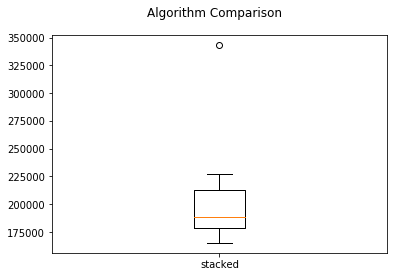

In [482]:
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=7,random_state=0)
	cv_results = cross_val_score(model,Xs, y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [483]:
model = stacked.fit(Xs,y)

0:	learn: 825310.4960725	total: 37.7ms	remaining: 37.7s
1:	learn: 806522.1434143	total: 91.9ms	remaining: 45.9s
2:	learn: 788741.8354216	total: 117ms	remaining: 38.8s
3:	learn: 770987.1455514	total: 149ms	remaining: 37.2s
4:	learn: 754294.7593445	total: 169ms	remaining: 33.7s
5:	learn: 738056.3958246	total: 207ms	remaining: 34.3s
6:	learn: 722417.8608064	total: 228ms	remaining: 32.3s
7:	learn: 706719.4337398	total: 246ms	remaining: 30.5s
8:	learn: 691795.0114195	total: 263ms	remaining: 29s
9:	learn: 677963.9590529	total: 297ms	remaining: 29.4s
10:	learn: 664285.6213847	total: 318ms	remaining: 28.6s
11:	learn: 651146.6539472	total: 336ms	remaining: 27.6s
12:	learn: 637750.7880155	total: 355ms	remaining: 27s
13:	learn: 625740.5303802	total: 372ms	remaining: 26.2s
14:	learn: 613726.9856868	total: 393ms	remaining: 25.8s
15:	learn: 601580.0494849	total: 412ms	remaining: 25.3s
16:	learn: 590154.2999129	total: 430ms	remaining: 24.9s
17:	learn: 579427.7933362	total: 451ms	remaining: 24.6s
18:	

155:	learn: 253830.2146790	total: 3s	remaining: 16.2s
156:	learn: 253610.3174977	total: 3.02s	remaining: 16.2s
157:	learn: 253282.3998301	total: 3.04s	remaining: 16.2s
158:	learn: 253014.4858335	total: 3.05s	remaining: 16.1s
159:	learn: 252693.1538637	total: 3.07s	remaining: 16.1s
160:	learn: 252397.4414334	total: 3.09s	remaining: 16.1s
161:	learn: 252205.1174886	total: 3.11s	remaining: 16.1s
162:	learn: 251918.6208274	total: 3.13s	remaining: 16.1s
163:	learn: 251765.1404650	total: 3.15s	remaining: 16s
164:	learn: 251609.4569672	total: 3.16s	remaining: 16s
165:	learn: 251433.8919810	total: 3.18s	remaining: 16s
166:	learn: 251231.3754655	total: 3.21s	remaining: 16s
167:	learn: 251069.9462884	total: 3.23s	remaining: 16s
168:	learn: 250863.7545464	total: 3.25s	remaining: 16s
169:	learn: 250687.7430924	total: 3.27s	remaining: 16s
170:	learn: 250424.5196613	total: 3.29s	remaining: 15.9s
171:	learn: 250280.4832080	total: 3.32s	remaining: 16s
172:	learn: 250137.6430858	total: 3.34s	remaining:

304:	learn: 235474.6050911	total: 6.18s	remaining: 14.1s
305:	learn: 235445.7880915	total: 6.2s	remaining: 14.1s
306:	learn: 235369.9802251	total: 6.22s	remaining: 14s
307:	learn: 235245.1550202	total: 6.24s	remaining: 14s
308:	learn: 235193.1208119	total: 6.26s	remaining: 14s
309:	learn: 235157.2552942	total: 6.28s	remaining: 14s
310:	learn: 235097.0486152	total: 6.29s	remaining: 13.9s
311:	learn: 235040.6080972	total: 6.31s	remaining: 13.9s
312:	learn: 234972.6845295	total: 6.33s	remaining: 13.9s
313:	learn: 234892.9381638	total: 6.35s	remaining: 13.9s
314:	learn: 234812.5009674	total: 6.37s	remaining: 13.8s
315:	learn: 234734.4904311	total: 6.39s	remaining: 13.8s
316:	learn: 234669.6755663	total: 6.41s	remaining: 13.8s
317:	learn: 234623.0330856	total: 6.42s	remaining: 13.8s
318:	learn: 234554.9546945	total: 6.44s	remaining: 13.8s
319:	learn: 234513.7506710	total: 6.46s	remaining: 13.7s
320:	learn: 234471.9171665	total: 6.48s	remaining: 13.7s
321:	learn: 234375.5264336	total: 6.49s	

453:	learn: 227441.4571764	total: 8.89s	remaining: 10.7s
454:	learn: 227391.8269898	total: 8.91s	remaining: 10.7s
455:	learn: 227360.7186178	total: 8.93s	remaining: 10.6s
456:	learn: 227290.2864105	total: 8.94s	remaining: 10.6s
457:	learn: 227255.1770644	total: 8.96s	remaining: 10.6s
458:	learn: 227214.7068652	total: 8.98s	remaining: 10.6s
459:	learn: 227159.2547079	total: 9s	remaining: 10.6s
460:	learn: 227103.3706503	total: 9.01s	remaining: 10.5s
461:	learn: 227065.4345951	total: 9.03s	remaining: 10.5s
462:	learn: 227029.9561379	total: 9.05s	remaining: 10.5s
463:	learn: 226985.2841820	total: 9.07s	remaining: 10.5s
464:	learn: 226896.3884877	total: 9.09s	remaining: 10.5s
465:	learn: 226874.0605605	total: 9.11s	remaining: 10.4s
466:	learn: 226855.5925683	total: 9.13s	remaining: 10.4s
467:	learn: 226826.9399561	total: 9.15s	remaining: 10.4s
468:	learn: 226781.0065219	total: 9.18s	remaining: 10.4s
469:	learn: 226738.4224401	total: 9.21s	remaining: 10.4s
470:	learn: 226675.7628742	total: 

603:	learn: 221604.0635827	total: 12s	remaining: 7.88s
604:	learn: 221592.2082774	total: 12s	remaining: 7.86s
605:	learn: 221577.1639636	total: 12s	remaining: 7.83s
606:	learn: 221548.0483413	total: 12.1s	remaining: 7.81s
607:	learn: 221527.9650644	total: 12.1s	remaining: 7.79s
608:	learn: 221504.4153409	total: 12.1s	remaining: 7.77s
609:	learn: 221476.9759925	total: 12.1s	remaining: 7.75s
610:	learn: 221454.4084782	total: 12.1s	remaining: 7.73s
611:	learn: 221444.0824177	total: 12.2s	remaining: 7.71s
612:	learn: 221415.8506098	total: 12.2s	remaining: 7.69s
613:	learn: 221406.1976015	total: 12.2s	remaining: 7.66s
614:	learn: 221390.0917458	total: 12.2s	remaining: 7.64s
615:	learn: 221349.6618494	total: 12.2s	remaining: 7.62s
616:	learn: 221326.8926086	total: 12.2s	remaining: 7.6s
617:	learn: 221319.3708319	total: 12.3s	remaining: 7.58s
618:	learn: 221281.8316185	total: 12.3s	remaining: 7.56s
619:	learn: 221274.8012345	total: 12.3s	remaining: 7.54s
620:	learn: 221231.1442536	total: 12.3

753:	learn: 218329.6507715	total: 14.7s	remaining: 4.81s
754:	learn: 218323.5970630	total: 14.8s	remaining: 4.79s
755:	learn: 218296.1380478	total: 14.8s	remaining: 4.77s
756:	learn: 218290.7879384	total: 14.8s	remaining: 4.75s
757:	learn: 218266.0305040	total: 14.8s	remaining: 4.73s
758:	learn: 218261.9341003	total: 14.8s	remaining: 4.71s
759:	learn: 218237.4378994	total: 14.9s	remaining: 4.7s
760:	learn: 218225.7188998	total: 14.9s	remaining: 4.69s
761:	learn: 218205.1557657	total: 14.9s	remaining: 4.67s
762:	learn: 218193.7838052	total: 15s	remaining: 4.65s
763:	learn: 218189.8240780	total: 15s	remaining: 4.63s
764:	learn: 218179.7420710	total: 15s	remaining: 4.61s
765:	learn: 218130.7953270	total: 15s	remaining: 4.59s
766:	learn: 218126.9664727	total: 15.1s	remaining: 4.58s
767:	learn: 218125.4284428	total: 15.1s	remaining: 4.56s
768:	learn: 218089.0723641	total: 15.1s	remaining: 4.54s
769:	learn: 218071.7365014	total: 15.2s	remaining: 4.53s
770:	learn: 218053.9897130	total: 15.2s	

898:	learn: 215824.8949971	total: 17.9s	remaining: 2.01s
899:	learn: 215824.0427598	total: 17.9s	remaining: 1.99s
900:	learn: 215805.0558762	total: 17.9s	remaining: 1.97s
901:	learn: 215796.8900708	total: 18s	remaining: 1.95s
902:	learn: 215781.5638017	total: 18s	remaining: 1.93s
903:	learn: 215747.3308768	total: 18s	remaining: 1.91s
904:	learn: 215720.0515785	total: 18s	remaining: 1.89s
905:	learn: 215711.0598823	total: 18s	remaining: 1.87s
906:	learn: 215710.2297455	total: 18s	remaining: 1.85s
907:	learn: 215691.2502442	total: 18.1s	remaining: 1.83s
908:	learn: 215677.3135189	total: 18.1s	remaining: 1.81s
909:	learn: 215661.0005170	total: 18.1s	remaining: 1.79s
910:	learn: 215627.4212681	total: 18.1s	remaining: 1.77s
911:	learn: 215600.8345488	total: 18.1s	remaining: 1.75s
912:	learn: 215586.7189859	total: 18.2s	remaining: 1.73s
913:	learn: 215457.5695286	total: 18.2s	remaining: 1.71s
914:	learn: 215443.9382283	total: 18.2s	remaining: 1.69s
915:	learn: 215441.0663281	total: 18.2s	rem

### Test data

In [484]:
pred = model.predict(tns)

In [485]:
t = pd.read_csv('D:Test Data Set.csv')

In [296]:
tt = t

In [297]:
t.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [298]:
t.shape

(5615, 16)

In [299]:
t.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
dtype: int64

In [300]:
cat_col = t.select_dtypes(['object']).columns
cat_col # no cat columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'body_type', 'transmission',
       'door_count', 'seat_count', 'fuel_type'],
      dtype='object')

In [302]:
t['model'].value_counts()

octavia     1333
yaris        341
superb       341
qashqai      301
x3           282
x1           240
i30          229
q5           209
micra        195
panda        195
avensis      185
x5           182
yeti         180
q3           179
auris        176
coupe        174
rapid        159
aygo         149
roomster     140
q7           123
tt           103
juke         101
citigo        98
Name: model, dtype: int64

In [303]:
a_maker=pd.get_dummies(t['Maker'])
a_model=pd.get_dummies(t['model'])
a_location=pd.get_dummies(t['Location'])
a_transmission=pd.get_dummies(t['transmission'])
a_fueltype=pd.get_dummies(t['fuel_type'])
tu=pd.concat([t,a_maker,a_model,a_location,a_transmission,a_fueltype],axis=1)
tu.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,...,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,auto,man,diesel,petrol
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,...,0,0,0,0,1,0,0,1,0,1
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,...,0,0,0,0,0,0,0,1,1,0
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,...,0,0,0,0,0,0,0,1,1,0
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,...,0,0,0,0,0,0,1,0,1,0
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,...,0,0,0,0,0,0,1,0,0,1


In [304]:
t['model'].value_counts

<bound method IndexOpsMixin.value_counts of 0       octavia
1         rapid
2       octavia
3            q3
4            tt
         ...   
5610    octavia
5611     superb
5612    octavia
5613    qashqai
5614        i30
Name: model, Length: 5615, dtype: object>

In [305]:
t=tu.drop(['Maker', 'model', 'Location', 'transmission', 'fuel_type'],axis=1)
t.head()

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,door_count,...,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,auto,man,diesel,petrol
0,11001,150000.0,First,2007,12,1595,75.0,NaN,5,4,...,0,0,0,0,1,0,0,1,0,1
1,11002,29376.0,Third,2014,5,1598,77.0,NaN,4,4,...,0,0,0,0,0,0,0,1,1,0
2,11003,30563.0,Second,2014,5,1968,110.0,NaN,5,5,...,0,0,0,0,0,0,0,1,1,0
3,11004,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,4,...,0,0,0,0,0,0,1,0,1,0
4,11005,6400.0,Third,2015,4,1984,169.0,NaN,4,2,...,0,0,0,0,0,0,1,0,0,1


In [306]:
t['Owner Type'].replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace=True)

In [307]:
t['door_count'].replace({'None':np.nan},inplace=True)

In [308]:
t['door_count']=pd.to_numeric(t['door_count'],errors='coerce')

In [309]:
t['seat_count'].replace({'None':np.nan},inplace=True)

In [310]:
t['seat_count']=pd.to_numeric(t['seat_count'],errors='coerce')

In [311]:
t.drop('Id',axis = 1,inplace = True)

### Missing values

In [312]:
t.isnull().sum()

Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
door_count              806
seat_count              891
audi                      0
bmw                       0
fiat                      0
hyundai                   0
maserati                  0
nissan                    0
skoda                     0
toyota                    0
auris                     0
avensis                   0
aygo                      0
citigo                    0
coupe                     0
i30                       0
juke                      0
micra                     0
octavia                   0
panda                     0
q3                        0
q5                        0
q7                        0
qashqai                   0
rapid                     0
roomster                  0
superb                    0
tt                  

In [313]:
t['door_count'].fillna(t['door_count'].mode()[0], inplace=True)

In [314]:
t['seat_count'].fillna(t['seat_count'].mode()[0], inplace=True)

In [315]:
t['engine_power'].fillna(t['engine_power'].median(), inplace=True)

In [316]:
t['Distance '].fillna(t['Distance '].median(), inplace=True)
t.drop('body_type',axis =1, inplace = True)

In [317]:
t.shape

(5615, 55)

In [318]:
tn = t[['Distance ', 'Owner Type', 'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power', 'door_count', 'seat_count', 'audi', 'bmw', 'fiat', 'hyundai', 'maserati', 'nissan', 'skoda', 'toyota', 'auris', 'avensis', 'aygo', 'citigo', 'coupe', 'i30', 'juke', 'micra', 'octavia', 'panda', 'q3', 'q5', 'q7', 'qashqai', 'rapid', 'roomster', 'superb', 'tt', 'x1', 'x3', 'x5', 'yaris', 'yeti', 'auto', 'man', 'diesel', 'petrol']]

In [319]:
tn.shape

(5615, 43)

In [320]:
sc=StandardScaler()
Xs = sc.fit_transform(X)
tns = sc.transform(tn)

In [268]:
pred = GB.predict

(5615, 43)

In [486]:
t['Price'] = pred

In [487]:
df = pd.DataFrame(t, columns = ['Id', 'Price']) 

In [488]:
df.to_csv("E:/gl2.csv",index=False)